## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 
### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data preparation

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [2]:
import pandas as pd
import numpy as np
import os
import glob

In [3]:
df_car_data = pd.read_csv('car-price_data.csv')
print(df_car_data.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [4]:
df_car_data= df_car_data[['Make', 'Model', 'Year','Engine HP',
       'Engine Cylinders', 'Transmission Type',  'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP']]
df_car_data.columns = df_car_data.columns.str.replace(' ', '_').str.lower()
print(df_car_data.columns)
print(df_car_data.dtypes)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')
make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object


In [5]:
df_car_data.isnull().sum()  # engine_hp and engine_cylinders have 69 and 30 null values respectively

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [6]:
# Imputuing missing values with 0
df_car_data.engine_cylinders = df_car_data.engine_cylinders.fillna(0)
df_car_data.engine_hp = df_car_data.engine_hp.fillna(0)


In [7]:
print(df_car_data.columns)
df_car_data.rename({'msrp': 'price'}, axis=1, inplace=True)
print(df_car_data.columns)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')
Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


In [8]:
df_car_data.transmission_type.value_counts().sort_values(ascending=False)# -> Automatic 8266

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`


In [9]:
num_features = df_car_data.select_dtypes(include=['int64', 'float64']).columns
df_car_data[num_features].corr() # highway_mpg and city_mpg are highly correlated - 0.886

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.


In [10]:
mean_val = df_car_data['price'].mean()
df_car_data['above_average'] = np.where(df_car_data['price'] > mean_val, 1, 0)

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_full_train, df_test = train_test_split(df_car_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [13]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [16]:
from xml.etree.ElementInclude import include
from sklearn.metrics import mutual_info_score
def mutual_info_above_average(series):# 
    return mutual_info_score(series, df_full_train.above_average)

ls_categorical = df_full_train.select_dtypes(include=[object]).columns

In [17]:
mi = df_full_train[ls_categorical].apply(mutual_info_above_average)
mi.sort_values(ascending=False)# ->transmission_type - 0.02

model                0.460994
make                 0.238724
vehicle_style        0.083390
transmission_type    0.020884
dtype: float64

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [18]:
from numpy import float64
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

categorical = df_train.select_dtypes(include=[object]).columns.tolist()

numerical = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [21]:
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [22]:
y_pred_val = model.predict_proba(X_val)[:, 1]

In [23]:
y_pred_val = y_pred_val>0.5

In [24]:
(y_pred_val== y_val).mean().round(2) # 0.95

0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive


In [25]:
from hmac import new


cur_features = categorical + numerical



def log_reg(X_train, y_train, X_val, y_val):
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred_val = model.predict_proba(X_val)[:, 1]
    y_pred_val = y_pred_val>0.5
    return (y_pred_val== y_val).mean()
for i in [None,'year','engine_hp','transmission_type','city_mpg']:
    print(i)
    if i is None:
        new_features = cur_features
    else:
        new_features=cur_features.copy()
        new_features.remove(i)
    print(new_features)
    train_dict = df_train[new_features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[new_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    cur_val = log_reg(X_train, y_train, X_val, y_val)
    if new_features == cur_features:
        base = cur_val
    else:
        diff = base - cur_val
        print("diff",abs(diff))
    print(log_reg(X_train, y_train, X_val, y_val))

None
['make', 'model', 'transmission_type', 'vehicle_style', 'year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
0.9458665547629039
year
['make', 'model', 'transmission_type', 'vehicle_style', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
diff 0.0020981955518254436
0.9479647503147294
engine_hp
['make', 'model', 'transmission_type', 'vehicle_style', 'year', 'engine_cylinders', 'highway_mpg', 'city_mpg']
diff 0.022240872849349613
0.9236256819135543
transmission_type
['make', 'model', 'vehicle_style', 'year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
diff 0.0008392782207301552
0.9450272765421738
city_mpg
['make', 'model', 'transmission_type', 'vehicle_style', 'year', 'engine_hp', 'engine_cylinders', 'highway_mpg']
diff 0.0004196391103650221
0.946286193873269


* City Mpg has smallest difference of 0.00041

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.


In [26]:
df_full_train, df_test = train_test_split(df_car_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [27]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['price']
del df_val['price']
del df_test['price']

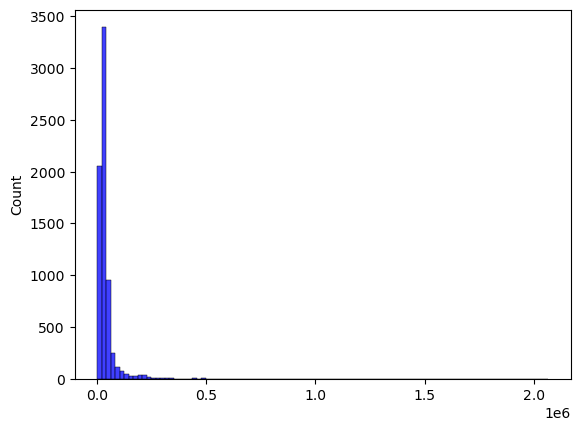

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_train, bins=100, color='blue')
plt.show()

<AxesSubplot: ylabel='Count'>

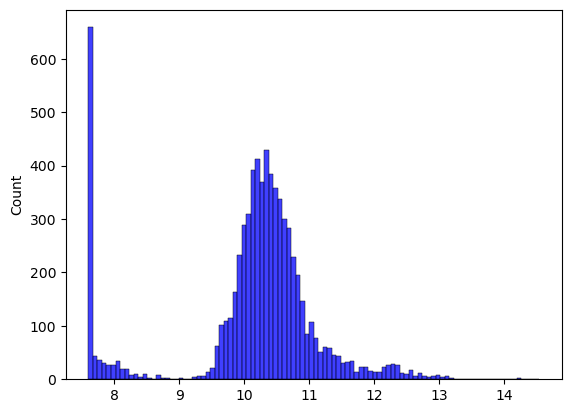

In [31]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

sns.histplot(y_train, bins=100, color='blue')

In [32]:
from sklearn.linear_model import Ridge

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def y_ridge_rmse(X_train,y_train,X_val,y_val,alpha_val):
    model =Ridge(alpha=alpha_val, solver='sag', random_state=42)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    return rmse(y_val,y_pred_val)

train_dict = df_train[df_train.columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[df_val.columns].to_dict(orient='records')
X_val = dv.transform(val_dict)



In [34]:
model =Ridge(alpha=0, solver='sag', random_state=42)
model.fit(X_train, y_train)

Ridge(alpha=0, random_state=42, solver='sag')

In [36]:
y_pred_val = model.predict(X_val)
rmse(y_val,y_pred_val)

0.49400982993009246

In [37]:

for i in [0.01,0.1,1,10]:
    print("Alpha",i)
    
    print(y_ridge_rmse(X_train,y_train,X_val,y_val,i))  

Alpha 0.01
0.4940099838768737
Alpha 0.1
0.49401136935655465
Alpha 1
0.49402522071467597
Alpha 10
0.4942504097475157
